## Homework Exercise

Start from this notebook.

Assume house price depends not only on size, but also on number of windows.

n_windows = np.random.randint(3,8,100)

house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples) + 15*n_windows

Try:
1) change the initial data, but keep using only house_sizes as regressor. What has changed?
2) adapt the notebook to using both house_sizes and n_windows as regressors. What has changed?
3) come up with a good way to visualize linear regression outputs with 2 regressors


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Seed per risultati ripetibili
np.random.seed(42)
n_samples = 200

# Dati originali (size e price)
house_sizes = np.random.randint(1000, 3000, n_samples)

# Numero di finestre
n_windows = np.random.randint(3, 8, n_samples)

# Prezzo della casa (aggiungiamo il contributo di n_windows, ma non lo usiamo come regressore)
house_prices = 100 + 0.2 * house_sizes - 0.00003 * house_sizes**2 + np.random.normal(0, 50, n_samples) + 15 * n_windows

### 1) change the initial data, but keep using only house_sizes as regressor. What has changed?

In [3]:
# Create a DataFrame
data = pd.DataFrame({
    'Size': house_sizes, 
    'Windows': n_windows,
    'Price': house_prices
})

# Display the first 5 rows of the dataset
data.head()

,Size,Windows,Price
0,2126,6,500.535693
1,2459,7,478.990608
2,1860,6,368.117602
3,2294,7,529.312774
4,2130,7,417.321303


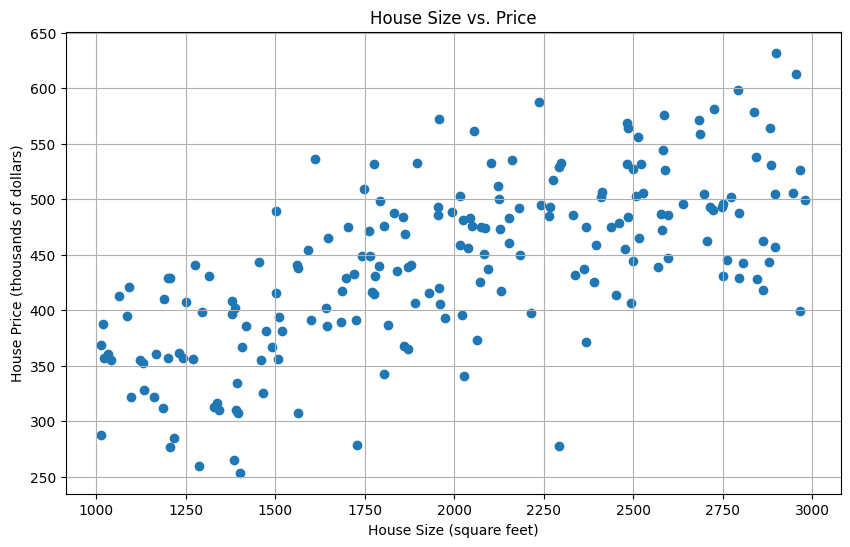

In [4]:
# Create a scatter plot of house size vs. price
plt.figure(figsize=(10, 6))
plt.scatter(data['Size'], data['Price'])
plt.title('House Size vs. Price')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price (thousands of dollars)')
plt.grid(True)
plt.show()

In [5]:
# Define features (X) and target (y)
X = data[['Size']]  # Features (input)
y = data['Price']   # Target (output)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")

Training data size: 160 samples
Testing data size: 40 samples


In [6]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Check the coefficient (slope) and intercept of our linear model
print(f"Model coefficient (slope): {model.coef_[0]:.4f}")
print(f"Model intercept: {model.intercept_:.4f}")
print(f"y = {model.intercept_:.4f} + {model.coef_[0]:.4f} * x")

Model coefficient (slope): 0.0959
Model intercept: 250.9276
y = 250.9276 + 0.0959 * x


In [7]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) - a common metric to evaluate regression models
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Calculate R-squared score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 2570.34
Root Mean Squared Error: 50.70
R-squared Score: 0.4739


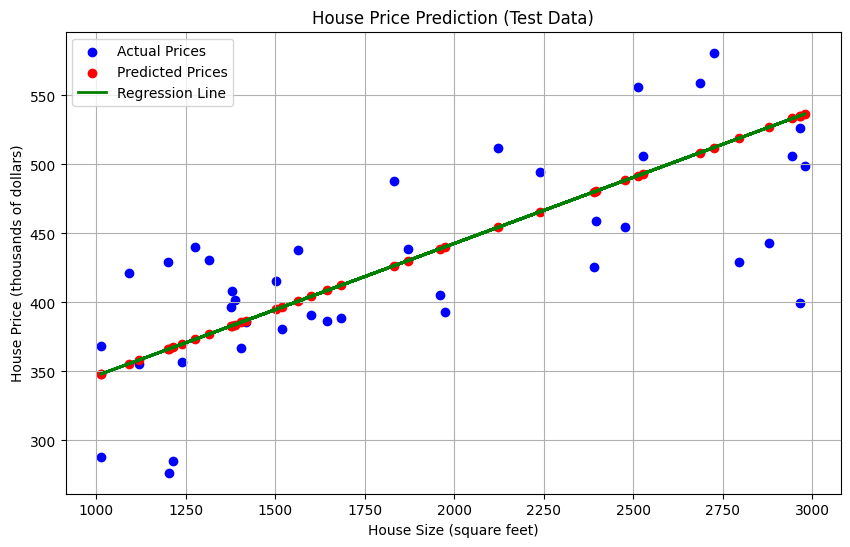

In [8]:
# Rappresento graficamente i punti originali
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')

# Rappresento graficamente le previsioni
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')

# Tracciare la linea di regressione
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.title('House Price Prediction (Test Data)')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price (thousands of dollars)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Definiamo nuove dimensioni delle case e numero di finestre per queste case
new_house_sizes = np.array([[1500], [2000], [2500]])  # Nuove dimensioni delle case
new_windows = np.array([5, 7, 10])  # Nuove finestre per ogni casa

# utilizzo modello per prevedere i prezzi
predicted_prices = model.predict(new_house_sizes)
# Aggiungere il contributo del numero di finestre al prezzo predetto
predicted_prices_with_windows = predicted_prices + 15 * new_windows

for size, windows, price in zip(new_house_sizes.flatten(), new_windows, predicted_prices_with_windows):
    print(f"A house with {size} square feet and {windows} windows is predicted to cost ${price:.2f} thousand")


A house with 1500 square feet and 5 windows is predicted to cost $469.76 thousand
A house with 2000 square feet and 7 windows is predicted to cost $547.71 thousand
A house with 2500 square feet and 10 windows is predicted to cost $640.65 thousand


C:\Users\franc\PycharmProjects\DataScience\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


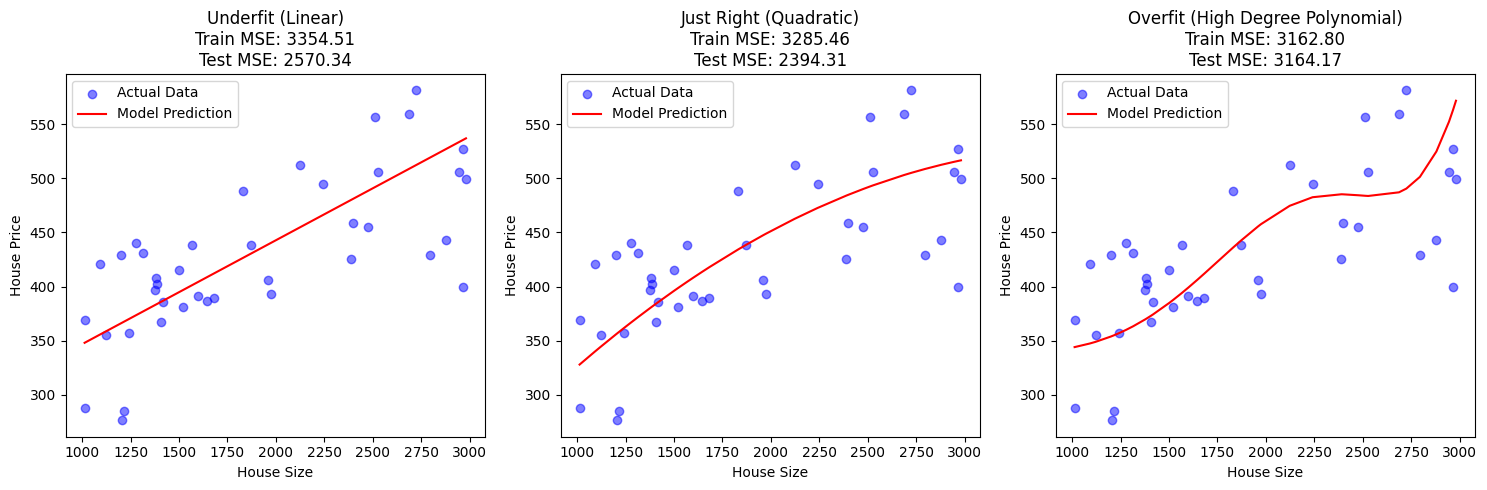

In [10]:
# Prepara i dati
X = data[['Size']]
y = data['Price']

# Dividi i dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creare modelli di diversa complessità
models = [
    ('Underfit (Linear)', LinearRegression()),
    ('Just Right (Quadratic)', make_pipeline(PolynomialFeatures(2), LinearRegression())),
    ('Overfit (High Degree Polynomial)', make_pipeline(PolynomialFeatures(10), LinearRegression()))
]

# Visualizza diverse complessità del modello
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models, 1):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcola gli errori
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Plot
    plt.subplot(1, 3, i)
    
    # Ordina X per tracciare curve uniformi
    sort_axis = np.argsort(X_test.values.flatten())
    X_test_sorted = X_test.values[sort_axis]
    y_test_sorted = y_test.values[sort_axis]
    y_pred_sorted = y_test_pred[sort_axis]
    
    # Diagramma di dispersione dei dati effettivi
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
   
    
    # Tracciare le previsioni del modello
    plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Model Prediction')
    
    plt.title(f'{name}\nTrain MSE: {train_mse:.2f}\nTest MSE: {test_mse:.2f}')
    plt.xlabel('House Size')
    plt.ylabel('House Price')
    plt.legend()

plt.tight_layout()
plt.show()

- Anche se ho modificato la formula per includere n_windows nel calcolo di house_prices, nella parte di regressione ho mantenuto solo house_sizes come regressore.

- La relazione tra le dimensioni della casa e il prezzo della casa è rimasta invariata, ma ora ci sarà un piccolo cambiamento nei prezzi effettivi delle case a causa dell'aggiunta di n_windows nel calcolo di house_prices. Tuttavia, questo cambiamento non verrà catturato dal modello di regressione lineare in quanto stiamo utilizzando solo house_sizes come regressore.

### 2) adapt the notebook to using both house_sizes and n_windows as regressors. What has changed?

In [11]:
# Preparare i dati
X = data[['Size', 'Windows']] 
y = data['Price']

# Dividi i dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Costruzione del modello con due regressori
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficiente e intercetta del modello
print(f"Coefficient for Size: {model.coef_[0]:.4f}")
print(f"Coefficient for Windows: {model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Equation: y = {model.intercept_:.4f} + {model.coef_[0]:.4f} * Size + {model.coef_[1]:.4f} * Windows")

Coefficient for Size: 0.0949
Coefficient for Windows: 12.4270
Intercept: 192.4216
Equation: y = 192.4216 + 0.0949 * Size + 12.4270 * Windows


In [12]:
# Predizioni sul test set
y_pred = model.predict(X_test)

# Calcolare l'errore quadratico medio (MSE) e il root mean squared error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Calcolare il coefficiente di determinazione R^2
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 2456.97
Root Mean Squared Error: 49.57
R-squared Score: 0.4971


- Aggiunta della variabile Windows come regressore.

- Ora uso due regressori: house_sizes e n_windows. Questo dovrebbe teoricamente migliorare le previsioni, poiché includiamo più variabili che influenzano il prezzo della casa.

- Visualizzazione dei risultati per ciascun modello, mostrando l'errore MSE e la previsione

- Il coefficiente associato a n_windows mostrerà l'influenza di questo fattore sul prezzo delle case

## 3) come up with a good way to visualize linear regression outputs with 2 regressors

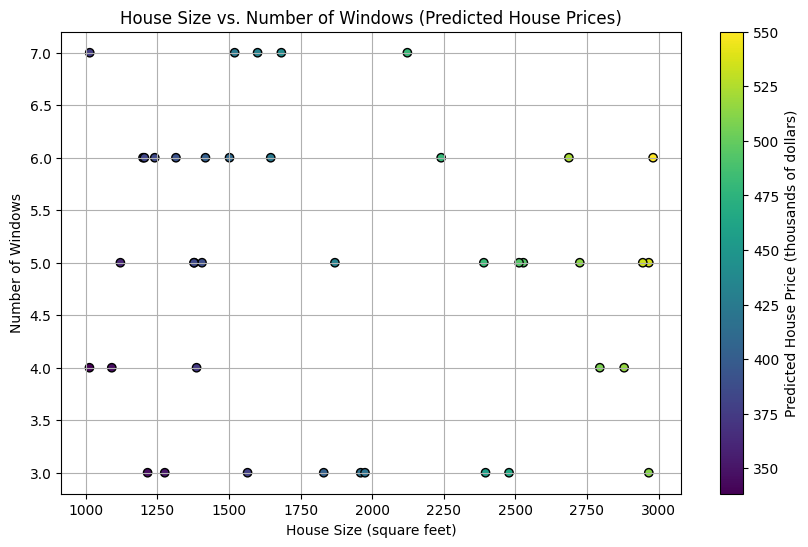

In [13]:
# Grafico 2D con colori
plt.figure(figsize=(10, 6))

# Creiamo un grafico scatter in cui il colore rappresenta i prezzi
scatter = plt.scatter(X_test['Size'], X_test['Windows'], c=y_pred, cmap='viridis', edgecolor='k')

# Aggiungi una barra dei colori per i prezzi
plt.colorbar(scatter, label='Predicted House Price (thousands of dollars)')

# Titoli e etichette
plt.title('House Size vs. Number of Windows (Predicted House Prices)')
plt.xlabel('House Size (square feet)')
plt.ylabel('Number of Windows')
plt.grid(True)
plt.show()

-Il grafico mostra come i prezzi previsti cambiano in funzione delle dimensioni della casa (asse X) e del numero di finestre (asse Y).

-I colori nei punti del grafico rappresentano il prezzo previsto per ogni combinazione di dimensioni della casa e numero di finestre.

POSSO CREARE ANCHE UN GRAFICO 3D

C:\Users\franc\PycharmProjects\DataScience\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


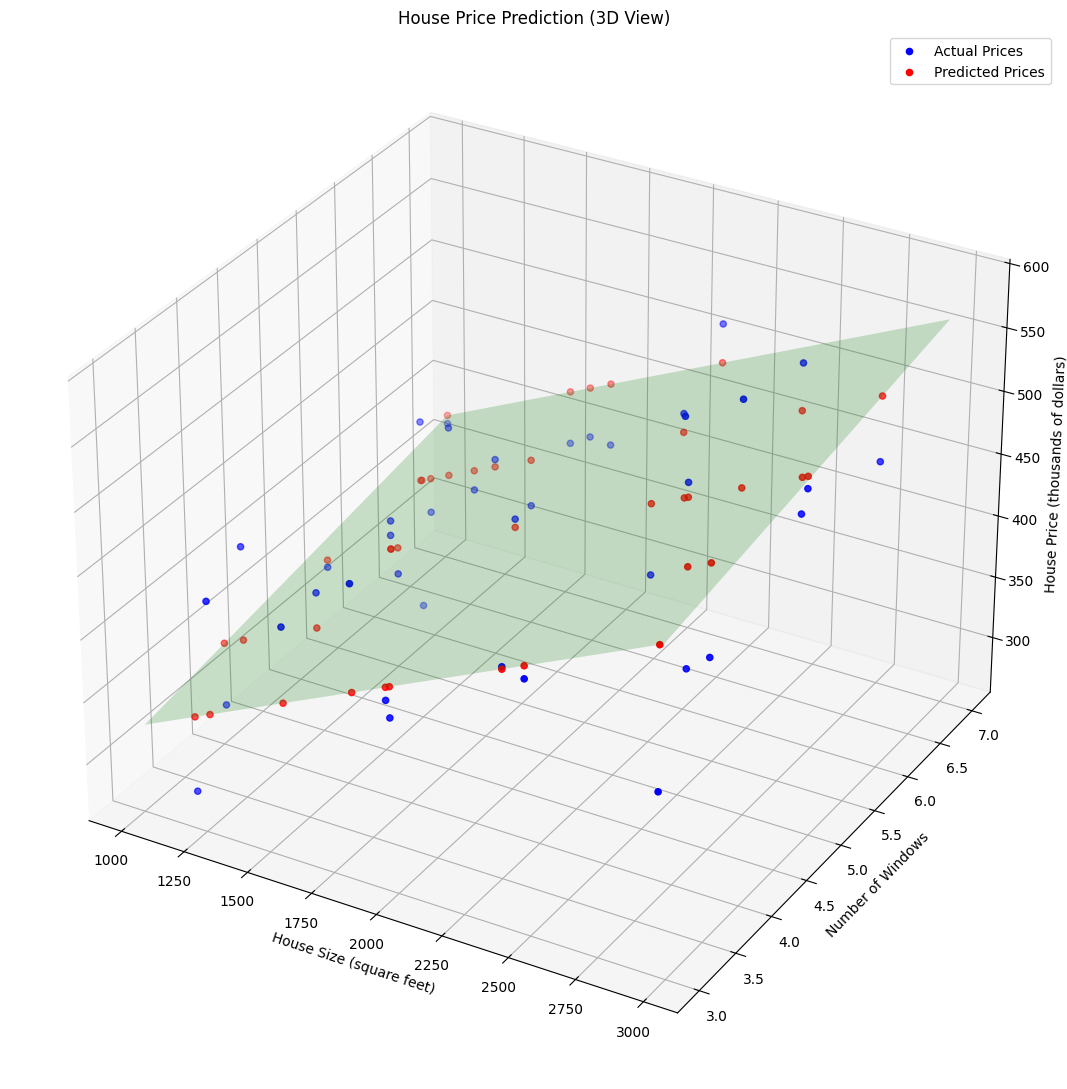

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che 'model' sia il tuo modello di regressione addestrato

# Predizioni per il grafico 3D
x_vals = X_test['Size'].values
w_vals = X_test['Windows'].values
y_vals = y_test.values
y_pred_vals = y_pred

# Crea una figura 3D
fig = plt.figure(figsize=(15, 11))
ax = fig.add_subplot(111, projection='3d')

# Grafico dei dati reali
ax.scatter(x_vals, w_vals, y_vals, color='blue', label='Actual Prices')

# Grafico delle predizioni
ax.scatter(x_vals, w_vals, y_pred_vals, color='red', label='Predicted Prices')

# Creare una griglia di punti per la superficie
size_range = np.linspace(X_test['Size'].min(), X_test['Size'].max(), 50)
windows_range = np.linspace(X_test['Windows'].min(), X_test['Windows'].max(), 50)
size_grid, windows_grid = np.meshgrid(size_range, windows_range)

# Calcolare le predizioni per ciascun punto della griglia
predicted_prices = model.predict(np.c_[size_grid.ravel(), windows_grid.ravel()]).reshape(size_grid.shape)

# Aggiungere la superficie di regressione
ax.plot_surface(size_grid, windows_grid, predicted_prices, color='green', alpha=0.2)

# Etichette e titolo
ax.set_xlabel('House Size (square feet)')
ax.set_ylabel('Number of Windows')
ax.set_zlabel('House Price (thousands of dollars)')
ax.set_title('House Price Prediction (3D View)')
ax.legend()
plt.subplots_adjust(right=0.85, top=0.85) 
plt.tight_layout()

plt.show()